## Exploratory Data Analysis (EDA)

Let's start with some exploratory data analysis:

In [1]:
# load libraries
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

plt.rcParams['figure.figsize'] = [5, 5]

2024-01-25 10:07:38.701082: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
! ls ./deep-learning-project/fruit-dataset-small/train/

Apple	Blueberry  Orange  Pear        Tomato
Banana	Lemon	   Peach   Strawberry  Watermelon


In [3]:
! ls ./deep-learning-project/fruit-dataset-small/validation/

Apple	Blueberry  Orange  Pear        Tomato
Banana	Lemon	   Peach   Strawberry  Watermelon


In [4]:
! ls ./deep-learning-project/fruit-dataset-small/test/

Apple	Blueberry  Orange  Pear        Tomato
Banana	Lemon	   Peach   Strawberry  Watermelon


We have ten classes of fruits in our data set.

In [5]:
data_dir = './deep-learning-project/fruit-dataset-small'
classes = [
    'Apple',
    'Banana',
    'Blueberry',
    'Lemon',
    'Orange',
    'Peach',
    'Pear',
    'Strawberry',
    'Tomato',
    'Watermelon'
]    

Let's check the number of images in training, validation and test sets:

In [6]:
for i in range(10):
    print(f'Number of training images for {classes[i]}: ', len(os.listdir(os.path.join(data_dir, 'train', classes[i]))))


Number of training images for Apple:  369
Number of training images for Banana:  367
Number of training images for Blueberry:  346
Number of training images for Lemon:  369
Number of training images for Orange:  359
Number of training images for Peach:  369
Number of training images for Pear:  369
Number of training images for Strawberry:  369
Number of training images for Tomato:  359
Number of training images for Watermelon:  356


In [7]:
for i in range(10):
    print(f'Number of validation images for {classes[i]}: ', len(os.listdir(os.path.join(data_dir, 'validation', classes[i]))))


Number of validation images for Apple:  123
Number of validation images for Banana:  123
Number of validation images for Blueberry:  116
Number of validation images for Lemon:  123
Number of validation images for Orange:  120
Number of validation images for Peach:  123
Number of validation images for Pear:  123
Number of validation images for Strawberry:  123
Number of validation images for Tomato:  120
Number of validation images for Watermelon:  119


In [8]:
for i in range(10):
    print(f'Number of test images for {classes[i]}: ', len(os.listdir(os.path.join(data_dir, 'test', classes[i]))))


Number of test images for Apple:  164
Number of test images for Banana:  166
Number of test images for Blueberry:  154
Number of test images for Lemon:  164
Number of test images for Orange:  160
Number of test images for Peach:  164
Number of test images for Pear:  164
Number of test images for Strawberry:  164
Number of test images for Tomato:  160
Number of test images for Watermelon:  157


Let's also have a quick look at the images:

Found 3632 images belonging to 10 classes.
Found 1213 images belonging to 10 classes.
Found 1617 images belonging to 10 classes.


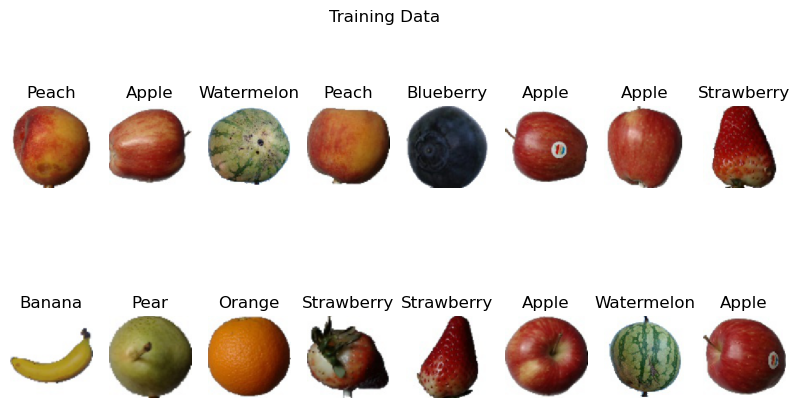

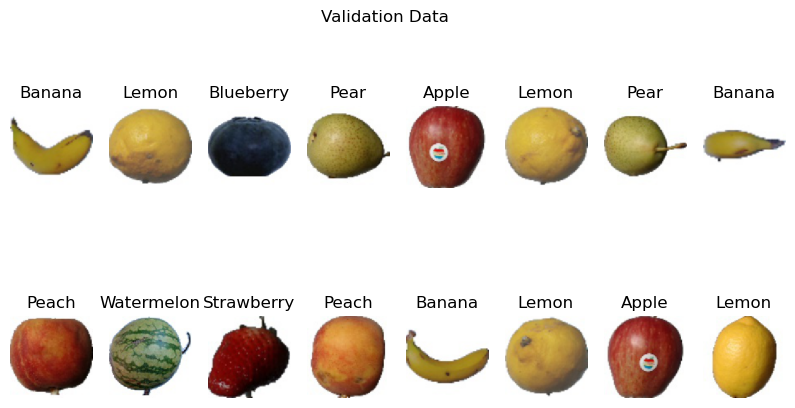

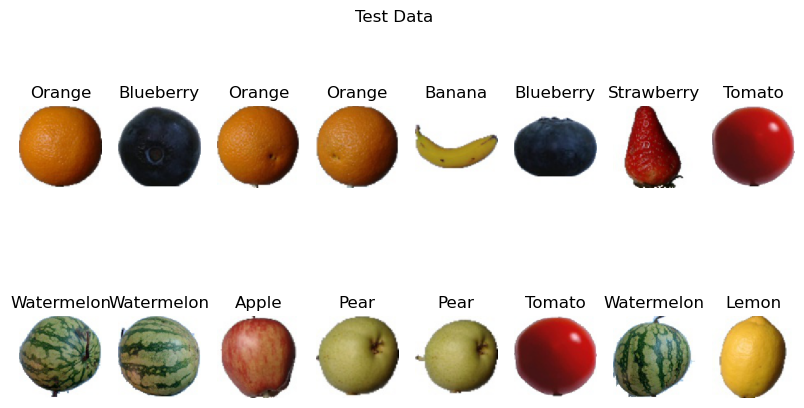

In [9]:
IMG_SIZE = 150
BATCH_SIZE = 16

def show_image(batch, batch_label, subset_name):
    plt.figure(figsize=(10, 5))
    plt.suptitle(subset_name, fontsize=12)
    for n in range(BATCH_SIZE):
        ax = plt.subplot(2, 8, n + 1)
        plt.imshow(batch[n])
        plt.title(classes[int(batch_label[n])])
        plt.axis("off")

train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'validation')
test_dir = os.path.join(data_dir, 'test')

train_datagen = ImageDataGenerator(rescale = 1.0/255.)
val_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_data = train_datagen.flow_from_directory(train_dir, batch_size=BATCH_SIZE, class_mode='binary', target_size=(IMG_SIZE, IMG_SIZE))
val_data = val_datagen.flow_from_directory(val_dir, batch_size=BATCH_SIZE, class_mode='binary', target_size=(IMG_SIZE, IMG_SIZE))
test_data = test_datagen.flow_from_directory(test_dir, batch_size=BATCH_SIZE, class_mode='binary', target_size=(IMG_SIZE, IMG_SIZE))

# Show 10 images from train, validation, and test sets:
train_batch, train_batch_label = next(iter(train_data))
show_image(train_batch, train_batch_label,'Training Data')
val_batch, val_batch_label = next(iter(val_data))
show_image(val_batch, val_batch_label,'Validation Data')
test_batch, test_batch_label = next(iter(test_data))
show_image(test_batch, test_batch_label,'Test Data')

## Using a pre-trained convolutional neural networks

As a pre-trained convolutional neural network (CNN), let's use the Xception model which had been trained on the Imagenet dataset.

In [10]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions


In [11]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))


2024-01-25 10:07:58.971107: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-25 10:07:58.981537: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-25 10:07:58.984952: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-25 10:07:58.988476: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

Let's see the predictions for a test image (which is a Watermelon):

In [12]:
path = './deep-learning-project/fruit-dataset-small/test/Watermelon'
name = '125_100.jpg'
fullname = f'{path}/{name}'
load_img(fullname)
img = load_img(fullname, target_size=(299, 299))
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [13]:
X = preprocess_input(X)


In [14]:
pred = model.predict(X)


2024-01-25 10:08:09.666692: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2024-01-25 10:08:10.338145: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-25 10:08:10.338850: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-25 10:08:10.338891: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2024-01-25 10:08:10.339585: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-25 10:08:10.339665: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


In [15]:
decode_predictions(pred)


[[('n07716906', 'spaghetti_squash', 0.52367824),
  ('n07717410', 'acorn_squash', 0.056328293),
  ('n07760859', 'custard_apple', 0.05033041),
  ('n07717556', 'butternut_squash', 0.0354432),
  ('n07753113', 'fig', 0.016982885)]]

As we see, the predictions from Xception are not very meaningful in our case since this model was trained on a larger data set which had many more classes, which are now irrelevant for us. Therefore, we will train our own dense layers on top of the CNN we got from Xception with transfer learning. 

## Transfer learning

In [16]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './deep-learning-project/fruit-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3632 images belonging to 10 classes.


In [17]:
train_ds.class_indices

{'Apple': 0,
 'Banana': 1,
 'Blueberry': 2,
 'Lemon': 3,
 'Orange': 4,
 'Peach': 5,
 'Pear': 6,
 'Strawberry': 7,
 'Tomato': 8,
 'Watermelon': 9}

In [18]:
X, y = next(train_ds)


In [19]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './deep-learning-project/fruit-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 1213 images belonging to 10 classes.


In [20]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10, activation='softmax')(vectors)

model = keras.Model(inputs, outputs)

In [21]:
learning_rate = 0.00001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=False)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


In [22]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
114/114 [==============================] - 14s 91ms/step - loss: 2.4073 - accuracy: 0.2037 - val_loss: 2.2191 - val_accuracy: 0.2308
Epoch 2/10
114/114 [==============================] - 8s 72ms/step - loss: 2.0579 - accuracy: 0.2718 - val_loss: 1.8994 - val_accuracy: 0.2976
Epoch 3/10
114/114 [==============================] - 8s 72ms/step - loss: 1.7560 - accuracy: 0.3929 - val_loss: 1.6249 - val_accuracy: 0.5021
Epoch 4/10
114/114 [==============================] - 8s 72ms/step - loss: 1.4996 - accuracy: 0.6154 - val_loss: 1.3907 - val_accuracy: 0.7057
Epoch 5/10
114/114 [==============================] - 8s 73ms/step - loss: 1.2825 - accuracy: 0.7676 - val_loss: 1.1931 - val_accuracy: 0.8063
Epoch 6/10
114/114 [==============================] - 8s 73ms/step - loss: 1.1005 - accuracy: 0.8499 - val_loss: 1.0284 - val_accuracy: 0.8813
Epoch 7/10
114/114 [==============================] - 8s 72ms/step - loss: 0.9483 - accuracy: 0.8984 - val_loss: 0.8903 - val_accuracy: 0.915

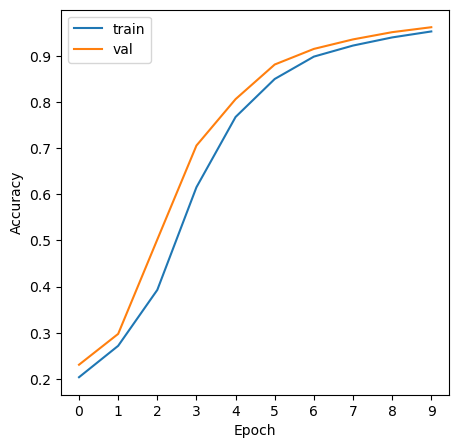

In [23]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks(np.arange(10))
plt.legend()

## Adjusting the learning rate

From the above image, we can say that a learning rate of 0.00001 is quite slow. Let's now compare the model performances with different values for learning rate:

In [24]:
# Function for building the model with a specified learning rate
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10, activation='softmax')(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=False)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [25]:
scores = {}

for lr in [0.00001, 0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

1e-05
Epoch 1/10
114/114 [==============================] - 11s 79ms/step - loss: 2.4069 - accuracy: 0.1556 - val_loss: 2.2200 - val_accuracy: 0.1781
Epoch 2/10
114/114 [==============================] - 8s 72ms/step - loss: 2.0654 - accuracy: 0.2412 - val_loss: 1.9057 - val_accuracy: 0.3223
Epoch 3/10
114/114 [==============================] - 8s 72ms/step - loss: 1.7698 - accuracy: 0.4064 - val_loss: 1.6332 - val_accuracy: 0.5054
Epoch 4/10
114/114 [==============================] - 8s 72ms/step - loss: 1.5138 - accuracy: 0.5895 - val_loss: 1.3977 - val_accuracy: 0.6908
Epoch 5/10
114/114 [==============================] - 8s 72ms/step - loss: 1.2941 - accuracy: 0.7503 - val_loss: 1.1972 - val_accuracy: 0.8277
Epoch 6/10
114/114 [==============================] - 8s 72ms/step - loss: 1.1077 - accuracy: 0.8373 - val_loss: 1.0270 - val_accuracy: 0.8805
Epoch 7/10
114/114 [==============================] - 8s 73ms/step - loss: 0.9512 - accuracy: 0.8888 - val_loss: 0.8846 - val_accuracy:

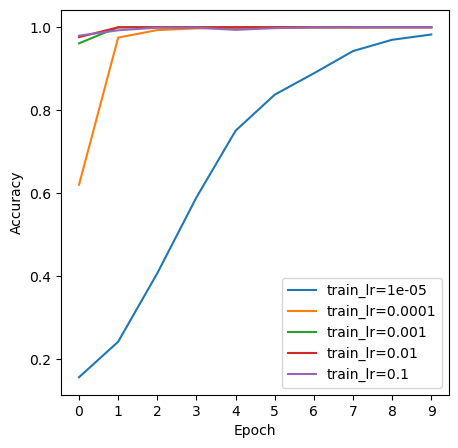

In [26]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train_lr=%s' % lr))
    #plt.plot(hist['val_accuracy'], label=('val=%s' % lr))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks(np.arange(10))
plt.legend()

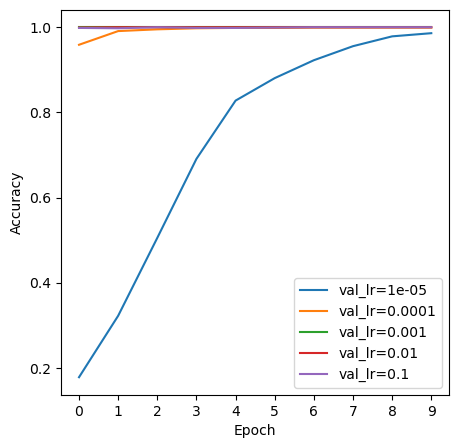

In [27]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val_lr=%s' % lr))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks(np.arange(10))
plt.legend()

- 0.01 seems to be a good value for the learning rate: Training and validation accuracies are close to 1.

## Regularization and dropout

Let's add dropout to our model and experiment with different values.

In [28]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.0):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    #outputs = keras.layers.Dense(10)(drop)
    outputs = keras.layers.Dense(10, activation='softmax')(drop)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=False)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [29]:
learning_rate = 0.01
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/10
114/114 [==============================] - 12s 80ms/step - loss: 0.1306 - accuracy: 0.9711 - val_loss: 0.0047 - val_accuracy: 0.9967
Epoch 2/10
114/114 [==============================] - 8s 73ms/step - loss: 0.0116 - accuracy: 0.9956 - val_loss: 0.0032 - val_accuracy: 0.9992
Epoch 3/10
114/114 [==============================] - 8s 73ms/step - loss: 0.0145 - accuracy: 0.9964 - val_loss: 3.3216e-04 - val_accuracy: 1.0000
Epoch 4/10
114/114 [==============================] - 8s 73ms/step - loss: 0.0040 - accuracy: 0.9983 - val_loss: 3.3725e-04 - val_accuracy: 1.0000
Epoch 5/10
114/114 [==============================] - 8s 73ms/step - loss: 5.1379e-06 - accuracy: 1.0000 - val_loss: 1.7104e-04 - val_accuracy: 1.0000
Epoch 6/10
114/114 [==============================] - 8s 73ms/step - loss: 2.9634e-06 - accuracy: 1.0000 - val_loss: 1.3984e-04 - val_accuracy: 1.0000
Epoch 7/10
114/114 [==============================] - 8s 73ms/step - loss: 2.5055e-06 - accuracy: 1.0000 - val_lo

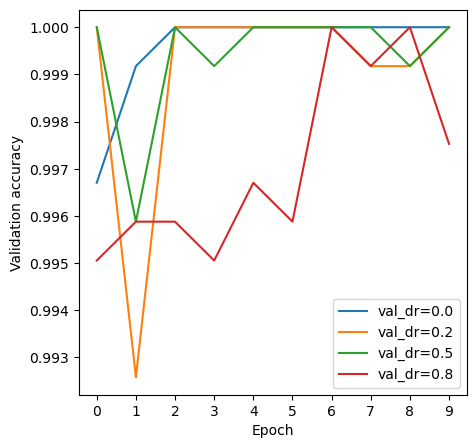

In [30]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val_dr=%s' % droprate))
plt.xlabel("Epoch")
plt.ylabel("Validation accuracy")
plt.xticks(np.arange(10))
plt.legend()

## Checkpointing and saving the final model

- 0.01 seems to be a good value for the learning rate, and adding dropout does not seem to be necessary as the validation accuracy is already very close to 1. Therefore, I prefer to keep the model simple and add no dropout in the final training of the model.

- Let's train the final model with callbacks and save the best model.

In [31]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10, activation='softmax')(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=False)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [32]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [33]:
learning_rate=0.01
model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
114/114 [==============================] - 12s 81ms/step - loss: 0.0651 - accuracy: 0.9802 - val_loss: 0.0045 - val_accuracy: 0.9975
Epoch 2/10
114/114 [==============================] - 9s 75ms/step - loss: 5.5187e-04 - accuracy: 1.0000 - val_loss: 7.8855e-04 - val_accuracy: 1.0000
Epoch 3/10
114/114 [==============================] - 8s 72ms/step - loss: 9.7140e-05 - accuracy: 1.0000 - val_loss: 3.1033e-04 - val_accuracy: 1.0000
Epoch 4/10
114/114 [==============================] - 8s 73ms/step - loss: 5.5430e-05 - accuracy: 1.0000 - val_loss: 1.4121e-04 - val_accuracy: 1.0000
Epoch 5/10
114/114 [==============================] - 8s 73ms/step - loss: 3.8773e-05 - accuracy: 1.0000 - val_loss: 1.3191e-04 - val_accuracy: 1.0000
Epoch 6/10
114/114 [==============================] - 8s 73ms/step - loss: 3.5230e-05 - accuracy: 1.0000 - val_loss: 1.0313e-04 - val_accuracy: 1.0000
Epoch 7/10
114/114 [==============================] - 8s 73ms/step - loss: 3.2261e-05 - accuracy: 1.0

## Using the model

- Let's evaluate the model's performance on test data set and use the model for making predictions:

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input


In [36]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './deep-learning-project/fruit-dataset-small/test',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 1617 images belonging to 10 classes.


In [37]:
model = keras.models.load_model('xception_v1_02_1.000.h5')

In [38]:
model.evaluate(test_ds)


51/51 [==============================] - 4s 66ms/step - loss: 0.0078 - accuracy: 0.9975


[0.0077718705870211124, 0.9975262880325317]

Let's predict the class of an image (whose true class label is strawberry) from test data set:

In [39]:
path = 'deep-learning-project/fruit-dataset-small/test/Strawberry/37_100.jpg'


In [40]:
img = load_img(path, target_size=(150, 150))


In [41]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 150, 150, 3)

In [42]:
X = preprocess_input(X)


In [43]:
pred = model.predict(X)


1/1 [==============================] - 1s 1s/step


In [44]:
classes = [
    'Apple',
    'Banana',
    'Blueberry',
    'Lemon',
    'Orange',
    'Peach',
    'Pear',
    'Strawberry',
    'Tomato',
    'Watermelon'
]

In [45]:
result_dict = dict(zip(classes, pred[0]))
result_dict

{'Apple': 1.5113884e-15,
 'Banana': 1.9058745e-12,
 'Blueberry': 8.0477416e-16,
 'Lemon': 4.6840436e-17,
 'Orange': 3.9444977e-16,
 'Peach': 7.374051e-14,
 'Pear': 2.1969045e-13,
 'Strawberry': 1.0,
 'Tomato': 4.9635877e-19,
 'Watermelon': 9.667134e-19}

In [46]:
result = max(result_dict, key=result_dict.get)

In [47]:
result

'Strawberry'